In [1]:
# import modules
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pickle import dump
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
# train dataset
train = pd.read_csv('Corona_NLP_train.csv', encoding = "ISO-8859-1")
test= pd.read_csv('Corona_NLP_test.csv', encoding = "ISO-8859-1")

In [3]:
# Combine datasets
train['train'] = 1
test['test'] = 0

In [4]:
combined = pd.concat([train, test]).reset_index(drop = True)

In [5]:
combined['Location'].fillna('Unknown', inplace = True)

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


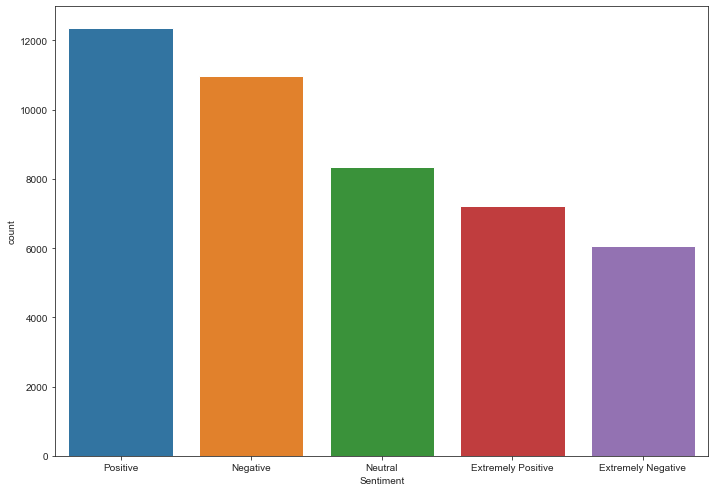

In [6]:
# Plot sentiment data
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(combined['Sentiment'], order=combined['Sentiment'].value_counts(ascending=False).index, ax=ax)
plt.savefig('originalSentiments.png')
plt.show()

In [7]:
# check contribution of each category
sentiment_order=combined['Sentiment'].value_counts(normalize = True)
sentiment_order

Positive              0.275142
Negative              0.243755
Neutral               0.185341
Extremely Positive    0.160672
Extremely Negative    0.135091
Name: Sentiment, dtype: float64

In [8]:
# replace the extreme values
combined.replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'}, inplace = True)

In [9]:
# rename columns to class and text
df = combined.rename(columns = {'OriginalTweet': 'text', 'Sentiment': 'class'})
df.head()

,UserName,ScreenName,Location,TweetAt,text,class,train,test
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,1.0,NaN
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,1.0,NaN
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,1.0,NaN
3,3802,48754,Unknown,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,1.0,NaN
4,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative,1.0,NaN


C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


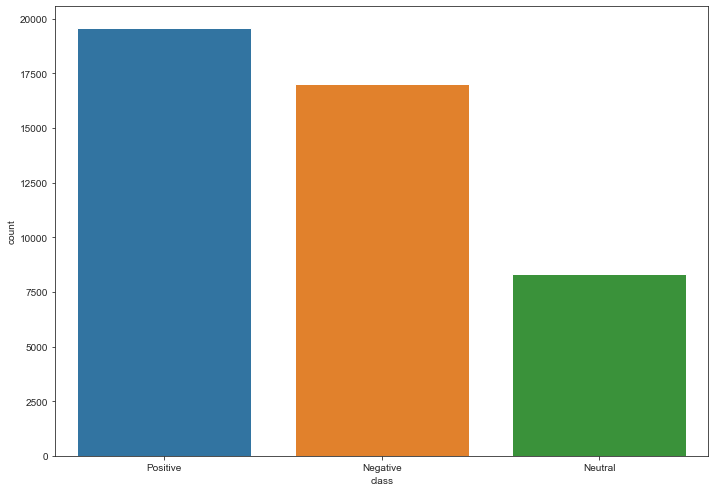

In [10]:
# Plot new sentiment data
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(df['class'], order=df['class'].value_counts(ascending=False).index, ax=ax)
plt.savefig('binarySentiments3.png')
plt.show()

In [11]:
from io import StringIO

df['class_id'] = df['class'].factorize()[0]
class_id_df = df[['class', 'class_id']].drop_duplicates().sort_values('class_id')
class_to_id = dict(class_id_df.values)
id_to_class = dict(class_id_df[['class_id', 'class']].values)
df.head()

,UserName,ScreenName,Location,TweetAt,text,class,train,test,class_id
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,1.0,NaN,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,1.0,NaN,1
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,1.0,NaN,1
3,3802,48754,Unknown,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,1.0,NaN,1
4,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative,1.0,NaN,2


In [12]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

In [16]:
# pad sequences
max_length = max([len(x.split()) for x in df['text']])

In [18]:
# define vocabulary size
vocab_size = len(tokenizer.word_index)  + 1

In [21]:
# data tokens
data_tokens = tokenizer.texts_to_sequences(df['text'])
data_pad = pad_sequences(data_tokens, maxlen = max_length, padding = 'post')

In [41]:
from sklearn.preprocessing import LabelEncoder
# format target labels
le = LabelEncoder()
label_id_coded = le.fit_transform(df['class'])

In [31]:
from keras.utils import to_categorical
# label_id_cats = to_categorical(label_id_coded)

In [42]:
df['label_id'] = [x for x in label_id_coded]

In [43]:
df.head()

,UserName,ScreenName,Location,TweetAt,text,class,train,test,class_id,label_id
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,1.0,NaN,0,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,1.0,NaN,1,2
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,1.0,NaN,1,2
3,3802,48754,Unknown,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,1.0,NaN,1,2
4,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative,1.0,NaN,2,0


In [44]:
# split data

X_train = data_pad[df['train'] == 1]
X_test = data_pad[df['test'] == 0]

y_train = df['label_id'][df['train'] == 1]
y_test = df['label_id'][df['test'] == 0]

In [45]:
# build model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

In [48]:
EMBEDDING_DIM = 100

print('Building Model .........')
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length = max_length))
model.add(GRU(units = 32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(activation = 'softmax', units = 3))

# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print('Model Summary.....')
print(model.summary())

Building Model .........
Model Summary.....
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 64, 100)           9022300   
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 9,035,167
Trainable params: 9,035,167
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
# Train the model
num_epochs = 10
batch_size = 50
history = model.fit(X_train, y_train,
                   batch_size = batch_size,
                   epochs = num_epochs,
                   verbose = 2,
                   validation_split = 0.2)

Train on 32925 samples, validate on 8232 samples
Epoch 1/10


KeyboardInterrupt: 

In [50]:
score, accuracy = model.evaluate(X_test, y_test,
                                batch_size = batch_size,
                                verbose = 2)

print('Test accuracy:', accuracy)

Test accuracy: 0.4065297544002533
